# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From your project work directory, type:
    
    ipython notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
from numpy import * #Load all the numpy packages


### A Note About "import as"

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://note.io/1juA60F)

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = zeros((3))
b = ones((2, 3))
c = random.randint(1, 10, (2, 3, 4))
d = arange(0, 11, 1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a, b, c, d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[7, 1, 9, 6],
         [5, 3, 7, 2],
         [3, 3, 6, 3]],
 
        [[6, 1, 5, 3],
         [3, 9, 4, 2],
         [7, 9, 4, 4]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
## Arithmetic in arrays is element wise

In [5]:
a = array([20,30,40,50])
b = arange(4)
b

array([0, 1, 2, 3])

In [6]:
c = a - b
c

array([20, 29, 38, 47])

In [7]:
b ** 2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = arange(10) ** 2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = random.randint(1, 100, (4,4))

In [13]:
b

array([[77, 33, 31, 76],
       [85, 40, 83, 93],
       [18, 72, 92, 56],
       [82, 71, 43, 36]])

In [14]:
# Guess the output
print(b[2, 3])
print(b[0, 0])


56
77


In [15]:
b[0:3, 1], b[:, 1]

(array([33, 40, 72]), array([33, 40, 72, 71]))

In [16]:
b[1:3, :]

array([[85, 40, 83, 93],
       [18, 72, 92, 56]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
dates = pd.date_range('20140101', periods=6)
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-01, ..., 2014-01-06]
Length: 6, Freq: D, Timezone: None

In [19]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,0.185125,1.357372,1.309111,1.184949
2014-01-02,-2.392388,-0.739767,0.122134,0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330
2014-01-06,0.325850,-1.397472,-0.157098,1.107190


In [21]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
    'D' : np.array([3] * 4, dtype='int32'),
    'E' : 'foo'
})
    
df2

,A,B,C,D,E
0,1,2013-01-02,1,3,foo
1,1,2013-01-02,1,3,foo
2,1,2013-01-02,1,3,foo
3,1,2013-01-02,1,3,foo


In [22]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [23]:
df.head()

,A,B,C,D
2014-01-01,0.185125,1.357372,1.309111,1.184949
2014-01-02,-2.392388,-0.739767,0.122134,0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330


In [24]:
df.tail()

,A,B,C,D
2014-01-02,-2.392388,-0.739767,0.122134,0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330
2014-01-06,0.325850,-1.397472,-0.157098,1.107190


In [25]:
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-01-01, ..., 2014-01-06]
Length: 6, Freq: D, Timezone: None

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.103529,-0.050926,-0.518490,0.547771
std,1.308674,1.198574,1.173369,0.739458
min,-2.392388,-1.397472,-1.854623,-0.696351
25%,0.176721,-0.735307,-1.378342,0.196356
50%,0.255487,-0.511784,-0.598056,0.834404
75%,0.876261,0.942619,0.052326,1.067762
max,1.268934,1.497880,1.309111,1.184949


In [27]:
df.sort(columns='B')
df

,A,B,C,D
2014-01-01,0.185125,1.357372,1.309111,1.184949
2014-01-02,-2.392388,-0.739767,0.122134,0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330
2014-01-06,0.325850,-1.397472,-0.157098,1.107190


### Selection

In [28]:
df[['A','B']]

,A,B
2014-01-01,0.185125,1.357372
2014-01-02,-2.392388,-0.739767
2014-01-03,1.268934,-0.721926
2014-01-04,1.059731,-0.301642
2014-01-05,0.173920,1.497880
2014-01-06,0.325850,-1.397472


In [29]:
df[0:3]

,A,B,C,D
2014-01-01,0.185125,1.357372,1.309111,1.184949
2014-01-02,-2.392388,-0.739767,0.122134,0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031


In [30]:
# By label
df.loc[dates[0]]

A    0.185125
B    1.357372
C    1.309111
D    1.184949
Name: 2014-01-01 00:00:00, dtype: float64

In [31]:
# multi-axis by label
df.loc[:, ['A','B']]

,A,B
2014-01-01,0.185125,1.357372
2014-01-02,-2.392388,-0.739767
2014-01-03,1.268934,-0.721926
2014-01-04,1.059731,-0.301642
2014-01-05,0.173920,1.497880
2014-01-06,0.325850,-1.397472


In [32]:
# Date Range
df.loc['20140102':'20140104', ['B']]

,B
2014-01-02,-0.739767
2014-01-03,-0.721926
2014-01-04,-0.301642


In [33]:
# Fast access to scalar
df.at[dates[1], 'B']

-0.73976704863637577

In [34]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330
2014-01-06,0.325850,-1.397472,-0.157098,1.107190


### Boolean Indexing

In [35]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-02,-2.392388,-0.739767,0.122134,0.949479


In [36]:
df[(df.A < 0) & (df.B > 1)] # multiple conditions

,A,B,C,D


### Setting

In [37]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1 * df_posA

In [38]:
df_posA

,A,B,C,D
2014-01-01,0.185125,1.357372,1.309111,1.184949
2014-01-02,2.392388,0.739767,-0.122134,-0.949479
2014-01-03,1.268934,-0.721926,-1.491452,0.022031
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351
2014-01-05,0.173920,1.497880,-1.854623,0.719330
2014-01-06,0.325850,-1.397472,-0.157098,1.107190


In [39]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20140102', periods=6))

In [40]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1

In [42]:
df

,A,B,C,D,F
2014-01-01,0.185125,1.357372,1.309111,1.184949,NaN
2014-01-02,-2.392388,-0.739767,0.122134,0.949479,1
2014-01-03,1.268934,-0.721926,-1.491452,0.022031,2
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351,3
2014-01-05,0.173920,1.497880,-1.854623,0.719330,4
2014-01-06,0.325850,-1.397472,-0.157098,1.107190,5


### Missing Data

In [43]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [45]:
df1

,A,B,C,D,F,E
2014-01-01,0.185125,1.357372,1.309111,1.184949,NaN,1
2014-01-02,-2.392388,-0.739767,0.122134,0.949479,1,1
2014-01-03,1.268934,-0.721926,-1.491452,0.022031,2,NaN
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351,3,NaN


In [46]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [47]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.103529,-0.050926,-0.518490,0.547771,3.000000
std,1.308674,1.198574,1.173369,0.739458,1.581139
min,-2.392388,-1.397472,-1.854623,-0.696351,1.000000
25%,0.176721,-0.735307,-1.378342,0.196356,2.000000
50%,0.255487,-0.511784,-0.598056,0.834404,3.000000
75%,0.876261,0.942619,0.052326,1.067762,4.000000
max,1.268934,1.497880,1.309111,1.184949,5.000000


In [48]:
df.mean(), df.mean(1) # Operation on two different axes

(A    0.103529
 B   -0.050926
 C   -0.518490
 D    0.547771
 F    3.000000
 dtype: float64, 2014-01-01    1.009139
 2014-01-02   -0.212109
 2014-01-03    0.215517
 2014-01-04    0.404545
 2014-01-05    0.907302
 2014-01-06    0.975694
 Freq: D, dtype: float64)

### Applying functions

In [49]:
df

,A,B,C,D,F
2014-01-01,0.185125,1.357372,1.309111,1.184949,NaN
2014-01-02,-2.392388,-0.739767,0.122134,0.949479,1
2014-01-03,1.268934,-0.721926,-1.491452,0.022031,2
2014-01-04,1.059731,-0.301642,-1.039015,-0.696351,3
2014-01-05,0.173920,1.497880,-1.854623,0.719330,4
2014-01-06,0.325850,-1.397472,-0.157098,1.107190,5


In [50]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,0.185125,1.357372,1.309111,1.184949,NaN
2014-01-02,-2.207263,0.617605,1.431245,2.134428,1
2014-01-03,-0.938330,-0.104320,-0.060207,2.156459,3
2014-01-04,0.121401,-0.405962,-1.099222,1.460107,6
2014-01-05,0.295322,1.091918,-2.953845,2.179437,10
2014-01-06,0.621171,-0.305554,-3.110942,3.286627,15


In [51]:
df.apply(lambda x: x.max() - x.min())

A    3.661322
B    2.895352
C    3.163734
D    1.881300
F    4.000000
dtype: float64

In [52]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [53]:
random.randn(10, 4)

array([[-1.18064743, -0.22325004,  0.49262642, -1.20516485],
       [ 1.1380899 ,  0.48570708,  0.74571354,  0.50331069],
       [ 0.22293262, -0.19450879,  0.26353201, -0.16618622],
       [ 1.78719447, -0.02532958, -0.36672349, -1.14084519],
       [ 0.60259526, -0.33891407, -1.48224532, -0.46830127],
       [ 1.6686185 ,  0.96096727,  1.59267332,  0.37511612],
       [ 0.17613815,  0.35207121,  1.07615992, -0.44209082],
       [-0.53713992, -0.46970644, -0.28547028, -1.2924321 ],
       [ 0.38886659, -0.31639221, -0.56690515, -0.81043343],
       [-1.03158809,  2.17378569, -1.33780628,  2.00303614]])

In [54]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.708451,1.148724,1.039671,0.443342
1,0.226108,-2.470265,-0.629178,1.261298
2,2.144711,-0.027213,1.115203,1.248771
3,-0.268268,0.952173,-0.881279,0.604172
4,-0.481477,1.210471,-0.510401,0.629459
5,-1.381835,-0.289447,-0.202180,-0.916528
6,-1.093248,-1.145203,-1.165057,0.967184
7,-0.226382,1.615471,0.238498,-0.694156
8,1.967164,-0.825420,0.346480,1.644163
9,-0.599338,-0.215117,-1.074345,-0.010298


In [55]:
# Break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.708451  1.148724  1.039671  0.443342
 1  0.226108 -2.470265 -0.629178  1.261298
 2  2.144711 -0.027213  1.115203  1.248771,
           0         1         2         3
 3 -0.268268  0.952173 -0.881279  0.604172
 4 -0.481477  1.210471 -0.510401  0.629459
 5 -1.381835 -0.289447 -0.202180 -0.916528
 6 -1.093248 -1.145203 -1.165057  0.967184,
           0         1         2         3
 7 -0.226382  1.615471  0.238498 -0.694156
 8  1.967164 -0.825420  0.346480  1.644163
 9 -0.599338 -0.215117 -1.074345 -0.010298]

In [56]:
pd.concat(pieces)

,0,1,2,3
0,-1.708451,1.148724,1.039671,0.443342
1,0.226108,-2.470265,-0.629178,1.261298
2,2.144711,-0.027213,1.115203,1.248771
3,-0.268268,0.952173,-0.881279,0.604172
4,-0.481477,1.210471,-0.510401,0.629459
5,-1.381835,-0.289447,-0.202180,-0.916528
6,-1.093248,-1.145203,-1.165057,0.967184
7,-0.226382,1.615471,0.238498,-0.694156
8,1.967164,-0.825420,0.346480,1.644163
9,-0.599338,-0.215117,-1.074345,-0.010298


In [57]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-1.708451,1.148724,1.039671,0.443342
1,0.226108,-2.470265,-0.629178,1.261298
2,2.144711,-0.027213,1.115203,1.248771
3,-0.268268,0.952173,-0.881279,0.604172
4,-0.481477,1.210471,-0.510401,0.629459
5,-1.381835,-0.289447,-0.202180,-0.916528
6,-1.093248,-1.145203,-1.165057,0.967184
7,-0.226382,1.615471,0.238498,-0.694156
8,1.967164,-0.825420,0.346480,1.644163
9,-0.599338,-0.215117,-1.074345,-0.010298


### Grouping


In [58]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})

In [59]:
df

,A,B,C,D
0,foo,one,0.058701,0.287932
1,bar,one,-1.217754,1.045796
2,foo,two,-1.179523,-0.817259
3,bar,three,-0.886210,0.619999
4,foo,two,0.641245,1.049088
5,bar,two,-0.233074,-0.927050
6,foo,one,-1.185159,-1.033104
7,foo,three,0.741626,0.690894


In [60]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.217754  1.045796
    three -0.886210  0.619999
    two   -0.233074 -0.927050
foo one   -1.126458 -0.745171
    three  0.741626  0.690894
    two   -0.538278  0.231829

### Reshaping

In [61]:
# You can also stack or unstack levels

In [62]:
a = df.groupby(['A','B']).sum()

In [63]:
# Pivot Tables
pd.pivot_table(df, values=['C','D'], index=['A'], columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -1.217754 -0.886210 -0.233074  1.045796  0.619999 -0.927050
foo -0.563229  0.741626 -0.269139 -0.372586  0.690894  0.115915

### Time Series


In [64]:
import pandas as pd
import numpy as np

In [65]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [66]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [67]:
ts

2014-01-01 00:00:00     66
2014-01-01 00:00:01    207
2014-01-01 00:00:02    366
2014-01-01 00:00:03    262
2014-01-01 00:00:04     47
2014-01-01 00:00:05     10
2014-01-01 00:00:06     45
2014-01-01 00:00:07    254
2014-01-01 00:00:08     17
2014-01-01 00:00:09     15
2014-01-01 00:00:10    340
2014-01-01 00:00:11    454
2014-01-01 00:00:12    368
2014-01-01 00:00:13      5
2014-01-01 00:00:14     78
...
2014-01-01 00:01:25    115
2014-01-01 00:01:26    493
2014-01-01 00:01:27    422
2014-01-01 00:01:28    343
2014-01-01 00:01:29    274
2014-01-01 00:01:30     29
2014-01-01 00:01:31    305
2014-01-01 00:01:32    476
2014-01-01 00:01:33     31
2014-01-01 00:01:34    333
2014-01-01 00:01:35    275
2014-01-01 00:01:36    202
2014-01-01 00:01:37    422
2014-01-01 00:01:38    158
2014-01-01 00:01:39    437
Freq: S, Length: 100

In [68]:
# Built in resampling
ts.resample('1Min', how='mean') # Resample secondly to 1Minutely

2014-01-01 00:00:00    200.450
2014-01-01 00:01:00    271.275
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts. # position cursor after the period & hit tab key to use autocomplete to see full list of available methods

### Plotting


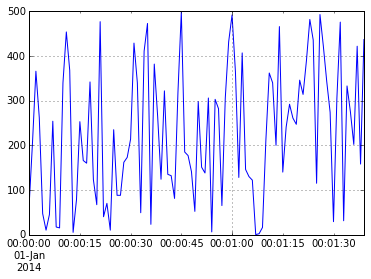

In [69]:
ts.plot()

In [70]:
def randwalk(startdate, points):
    ts = pd.Series(np.random.randn(points),
                   index=pd.date_range(startdate, periods=points))
    ts = ts.cumsum()
    ts.plot()
    return(ts)

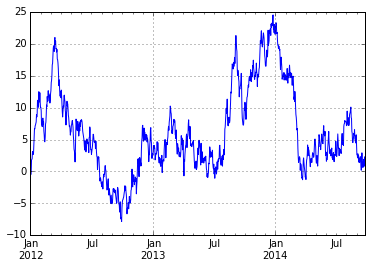

In [71]:
# Using pandas to make a simple random walker by repeatedly running:
a = randwalk('1/1/2012', 1000)

In [72]:
# Pandas plot function will print with labels as default

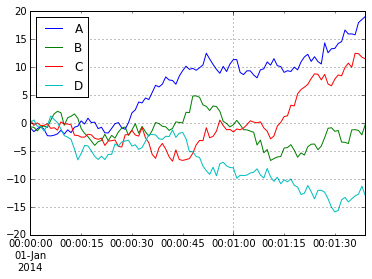

In [73]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas